# ~~~~~ Day 11 ~~~~~ 
## Part 1

In [45]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

with open('d11.txt', 'r') as f:
    content = f.readlines()

data = [[int(c) for c in list(d.strip('\n'))] for d in content]
octomap_start = np.asarray(data)
print(octomap_start.shape)
octomap_start

(10, 10)


array([[6, 3, 1, 8, 1, 8, 5, 7, 3, 2],
       [1, 1, 2, 2, 6, 8, 7, 1, 3, 5],
       [5, 1, 7, 3, 2, 3, 7, 6, 7, 6],
       [8, 7, 5, 4, 3, 6, 2, 6, 1, 2],
       [5, 7, 1, 8, 4, 7, 4, 6, 6, 6],
       [8, 4, 4, 3, 6, 5, 4, 1, 3, 7],
       [1, 2, 4, 7, 6, 3, 4, 3, 4, 6],
       [1, 4, 4, 6, 5, 1, 4, 5, 8, 5],
       [6, 7, 1, 7, 2, 8, 8, 2, 6, 7],
       [1, 7, 2, 7, 8, 7, 1, 2, 2, 8]])

In [42]:
octomap = np.copy(octomap_start)

flashes = 0
for iteration in range(0, 100):
    octomap += 1
    while np.sum(octomap>9)>0:
        flashed = np.where(octomap>9)
        flashes += np.sum(octomap>9)
        octomap[flashed] = -100
        for flashy, flashx in zip(*flashed):
            for y in range(-1, 2):
                for x in range(-1, 2):
                    if not (x==0 and y==0) and flashy+y >= 0 and flashx+x >= 0 and flashy+y < octomap.shape[0] and flashx+x < octomap.shape[1]:
                        octomap[flashy+y, flashx+x] += 1
    octomap[np.where(octomap<0)] = 0

print(flashes)

1634


## Part 2

In [46]:
octomap = np.copy(octomap_start)

iteration = 0
while np.sum(octomap != 0):
    iteration += 1
    octomap += 1
    while np.sum(octomap>9)>0:
        flashed = np.where(octomap>9)
        octomap[flashed] = -100
        for flashy, flashx in zip(*flashed):
            for y in range(-1, 2):
                for x in range(-1, 2):
                    if not (x==0 and y==0) and flashy+y >= 0 and flashx+x >= 0 and flashy+y < octomap.shape[0] and flashx+x < octomap.shape[1]:
                        octomap[flashy+y, flashx+x] += 1
    octomap[np.where(octomap<0)] = 0

print(iteration)

210


In [61]:
octo = plt.imread('octo.png')

Text(1, 1, '🐙')

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128025 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128025 missing from current font.
  font.set_text(s, 0, flags=flags)


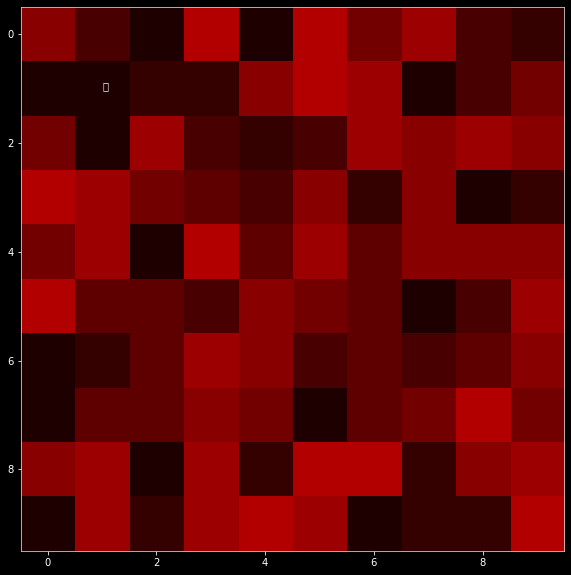

In [58]:
#plt.figure(figsize=(12,10))
fig, ax = plt.subplots(1, figsize=(12,10))
ax.imshow(octomap_start, cmap='hot', vmin=0, vmax=32)
ax.text(1, 1, '🐙', fontsize=10, color='white')
#plt.colorbar()